In [1]:
%matplotlib inline
from refer import REFER
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import os

# Load Refer Dataset

In [2]:
data_root = './data/SUNRGBD'  # contains refclef, refcoco, refcoco+, refcocog and images
dataset = 'sunspot'
splitBy = 'boulder'
refer = REFER(data_root, dataset, splitBy)

loading dataset sunspot into memory...
Loading ./data/SUNRGBD/sunspot/refs(boulder).p
creating index...
index created.
DONE (t=3.08s)


# Stats about the Dataset

In [3]:
# print stats about the given dataset
print('dataset [%s_%s] contains: ' % (dataset, splitBy))
ref_ids = refer.getRefIds()
image_ids = refer.getImgIds()
print('%s expressions for %s refs in %s images.' % (len(refer.Sents), len(ref_ids), len(image_ids)))

print('\nAmong them:')
if dataset == 'refclef':
    if splitBy == 'unc':
        splits = ['train', 'val', 'testA', 'testB', 'testC']
    else:
        splits = ['train', 'val', 'test']
elif dataset in ['refcoco', 'refcoco+', 'sunspot']:
    splits = ['train', 'val', 'test']
elif dataset == 'refcocog':
    splits = ['train', 'val']  # we don't have test split for refcocog right now.
    
for split in splits:
    ref_ids = refer.getRefIds(split=split)
    print('%s refs are in split [%s].' % (len(ref_ids), split))

dataset [sunspot_boulder] contains: 
7978 expressions for 3245 refs in 10335 images.

Among them:
2557 refs are in split [train].
253 refs are in split [val].
435 refs are in split [test].


# Show Refered Object and its Expressions

ref_id [3199] (ann_id [10199_3])
1. vacuum in the corner of the room with electrical cord piled on top of it , to the left of the white table and blue-gray chair.
2. the vacuum is in the corner behind the table
3. the vacuum is in the left corner of the room to the left of the blinds


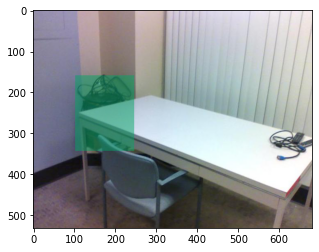

In [4]:
# randomly sample one ref
ref_ids = refer.getRefIds()
ref_id = ref_ids[np.random.randint(0, len(ref_ids))]
ref = refer.Refs[ref_id]
print('ref_id [%s] (ann_id [%s])' % (ref_id, refer.refToAnn[ref_id]['id']))
# show the segmentation of the referred object
plt.figure()
refer.showRef(ref, seg_box='seg')
plt.show()

1. vacuum in the corner of the room with electrical cord piled on top of it , to the left of the white table and blue-gray chair.
2. the vacuum is in the corner behind the table
3. the vacuum is in the left corner of the room to the left of the blinds


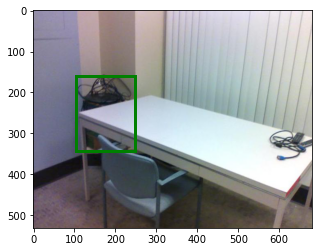

In [5]:
# or show the bounding box of the referred object
refer.showRef(ref, seg_box='box')
plt.show()

In [6]:
# let's look at the details of each ref
for sent in ref['sentences']:
    print('sent_id[%s]: %s' % (sent['sent_id'], sent['sent']))

sent_id[43704896_10199_3]: vacuum in the corner of the room with electrical cord piled on top of it , to the left of the white table and blue-gray chair.
sent_id[10030245_10199_3]: the vacuum is in the corner behind the table
sent_id[27403491_10199_3]: the vacuum is in the left corner of the room to the left of the blinds


43704896_10199_3: vacuum in the corner of the room with electrical cord piled on top of it , to the left of the white table and blue-gray chair.
Landmarks
1. ['the', 'white', 'table']
2. ['it']
3. ['electrical', 'cord']
4. ['blue-gray', 'chair', '.']
Missing segmentation: 10199_2_seg
Missing segmentation: 10199_17_seg


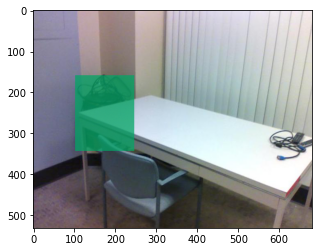

In [9]:
# look at the landmark objects
refer.showLandmarks(ref['sentences'][0])
